In [30]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

In [31]:
gt = open('GT_Prueba_1.txt')
pred = open('prediction_prueba_12.txt')

In [32]:
lineas_pred = pred.readlines()
lista_lineas_pred=[]
dict_lineas_pred={}
lista_lineas_pred_comun=[]

for linea in lineas_pred:
    #print(linea[:-1].split("\t"))
    val=[float(i)  for i in linea[:-1].split("\t")]
    if val[0]>19 and val[0]<41:
        if not val[1] in  dict_lineas_pred:
            dict_lineas_pred[val[1]]={"frame":[val[0]],"pos_x":[val[-2]],"pos_x2":[val[-2]],"pos_y":[val[-1]]}
        else:
            dict_lineas_pred[val[1]]["frame"].append(val[0])
            dict_lineas_pred[val[1]]["pos_x"].append(val[-2])
            dict_lineas_pred[val[1]]["pos_x2"].append(val[-4])
            dict_lineas_pred[val[1]]["pos_y"].append(val[-1])

    lista_lineas_pred.append(val)
    if val[1] in [1,2,3,5] and val[0]>19 and val[0]<41:
        lista_lineas_pred_comun.append(val)

In [33]:
lineas_gt = gt.readlines()
lista_lineas_gt=[]
dict_lineas_gt={}
for linea in lineas_gt:
    val=[float(i)  for i in linea[:-1].split("\t")]
    #print(dict_lineas_gt)
    if val[1] in  dict_lineas_gt:
        dict_lineas_gt[val[1]]["frame"].append(val[0])
        dict_lineas_gt[val[1]]["pos_x"].append(val[-2])
        dict_lineas_gt[val[1]]["pos_y"].append(val[-1])
    else:
    
        dict_lineas_gt[val[1]]={"frame":[val[0]],"pos_x":[val[-2]],"pos_y":[val[-1]]}
    #print(dict_lineas_gt)
    lista_lineas_gt.append(val)

In [34]:
print(len(lista_lineas_gt),len(lista_lineas_pred),len(lista_lineas_pred_comun))

84 387 84


In [35]:
cont=0
val_t=lista_lineas_gt[0][0]
for i in lista_lineas_gt:
    val_3=i[0]
    if val_3!=val_t:
        print(val_t,cont)
        val_t=val_3
        cont=1
    else:
        cont+=1

20.0 4
21.0 4
22.0 4
23.0 4
24.0 4
25.0 4
26.0 4
27.0 4
28.0 4
29.0 4
30.0 4
31.0 4
32.0 4
33.0 4
34.0 4
35.0 4
36.0 4
37.0 4
38.0 4
39.0 4


In [36]:
cont=0
val_t=lista_lineas_pred_comun[0][0]
for i in lista_lineas_pred_comun:
    val_3=i[0]
    if val_3!=val_t:
        print(val_t,cont)
        val_t=val_3
        cont=1
    else:
        cont+=1

20.0 4
21.0 4
22.0 4
23.0 4
24.0 4
25.0 4
26.0 4
27.0 4
28.0 4
29.0 4
30.0 4
31.0 4
32.0 4
33.0 4
34.0 4
35.0 4
36.0 4
37.0 4
38.0 4
39.0 4


# Test

    Para comprobar si funciona correctamente  comprobamos la correlación de las entradas cuanto mas se aproxime a una función lineal de pendiente 1  o -1 mejor y que el error cuadratico sea bajo

In [37]:
def MES(y_true,y_pred):
    return (np.square(y_true - y_pred)).mean()

def RMES(list1,lista2):
    return np.sqrt(MES(list1,lista2))

### Profundidad

In [38]:
#dict_lineas_gt
#dict_lineas_pred

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_val=np.array(dict_lineas_gt[key_gt]["pos_y"])+8*0.4
        if key_gt==6:
            key_gt=3
        elif key_gt==3:
            key_gt=4
        pixl_val=np.array(dict_lineas_pred[key_gt]["pos_y"])
        
        print(len(real_val),len(pixl_val))
        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])

1.0
21 21
Error Cuadrático Medio (MSE) = 0.001135417598729585
Raíz del Error Cuadrático Medio (RMSE) = 0.033695958195747826
2.0
21 21
Error Cuadrático Medio (MSE) = 1.800585528477989
Raíz del Error Cuadrático Medio (RMSE) = 1.3418589823368137
3.0
21 21
Error Cuadrático Medio (MSE) = 0.0009645882812641422
Raíz del Error Cuadrático Medio (RMSE) = 0.03105782157950139
6.0
21 21
Error Cuadrático Medio (MSE) = 3.191655223986074
Raíz del Error Cuadrático Medio (RMSE) = 1.7865204236129164


### EJE X

### Por Homografia

In [39]:
#dict_lineas_gt
#dict_lineas_pred

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_val=np.array(dict_lineas_gt[key_gt]["pos_x"])
        if key_gt==6:
            key_gt=3
        elif key_gt==3:
            key_gt=4

        pixl_val=np.array(dict_lineas_pred[key_gt]["pos_x"])
        
        print(len(real_val),len(pixl_val))
        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])

1.0
21 21
Error Cuadrático Medio (MSE) = 0.05492781340861294
Raíz del Error Cuadrático Medio (RMSE) = 0.2343668351294887
2.0
21 21
Error Cuadrático Medio (MSE) = 2.245207909564915
Raíz del Error Cuadrático Medio (RMSE) = 1.4984017850913403
3.0
21 21
Error Cuadrático Medio (MSE) = 0.057597838826247166
Raíz del Error Cuadrático Medio (RMSE) = 0.23999549751244745
6.0
21 21
Error Cuadrático Medio (MSE) = 0.9861477510501522
Raíz del Error Cuadrático Medio (RMSE) = 0.9930497223453376


### A traves del punto de convergencia

In [40]:
#dict_lineas_gt
#dict_lineas_pred

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_val=np.array(dict_lineas_gt[key_gt]["pos_x"])
        if key_gt==6:
            key_gt=3
        elif key_gt==3:
            key_gt=4
        pixl_val=np.array(dict_lineas_pred[key_gt]["pos_x2"])
        
        print(len(real_val),len(pixl_val))
        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])

1.0
21 21
Error Cuadrático Medio (MSE) = 0.005405690763197017
Raíz del Error Cuadrático Medio (RMSE) = 0.07352340282656276
2.0
21 21
Error Cuadrático Medio (MSE) = 15.78143803114866
Raíz del Error Cuadrático Medio (RMSE) = 3.972585811678416
3.0
21 21
Error Cuadrático Medio (MSE) = 1.979012485788472
Raíz del Error Cuadrático Medio (RMSE) = 1.4067737862884964
6.0
21 21
Error Cuadrático Medio (MSE) = 0.2350469866319116
Raíz del Error Cuadrático Medio (RMSE) = 0.4848164463298575


1.0
Error Cuadrático Medio (MSE) = 0.2350469866319116
Raíz del Error Cuadrático Medio (RMSE) = 0.4848164463298575
2.0
Error Cuadrático Medio (MSE) = 0.2350469866319116
Raíz del Error Cuadrático Medio (RMSE) = 0.4848164463298575
3.0
Error Cuadrático Medio (MSE) = 0.2350469866319116
Raíz del Error Cuadrático Medio (RMSE) = 0.4848164463298575
6.0
Error Cuadrático Medio (MSE) = 0.2350469866319116
Raíz del Error Cuadrático Medio (RMSE) = 0.4848164463298575


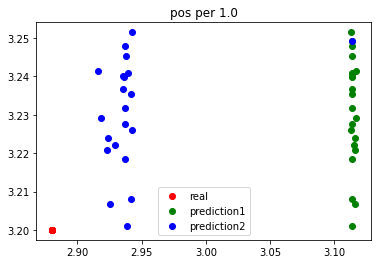

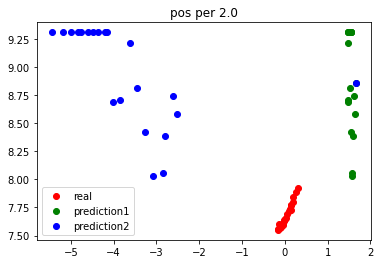

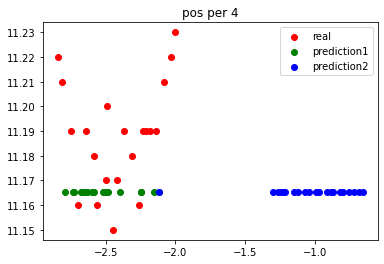

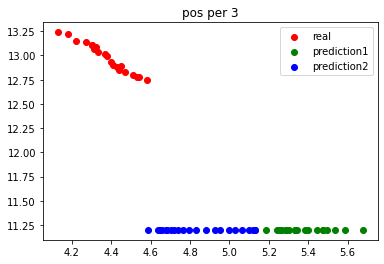

In [42]:
profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_valx=np.array(dict_lineas_gt[key_gt]["pos_x"])
        real_valy=np.array(dict_lineas_gt[key_gt]["pos_y"])+8*0.4
        if key_gt==6:
            key_gt=3
        elif key_gt==3:
            key_gt=4
        
        pixl_valy=np.array(dict_lineas_pred[key_gt]["pos_y"])
        pixl_valx=np.array(dict_lineas_pred[key_gt]["pos_x2"])
        
        pixl_valx2=np.array(dict_lineas_pred[key_gt]["pos_x"])
        
        
        plt.figure()
        plt.scatter(real_valx,real_valy,label='real', color='red')
        plt.scatter(pixl_valx2,pixl_valy,label='prediction1', color='green')
        plt.scatter(pixl_valx,pixl_valy,label='prediction2', color='blue')
        plt.legend()
        plt.title('pos per '+str(key_gt))

        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])